<a href="https://colab.research.google.com/github/bichpham102/analyticsCaseStudies/blob/main/chat_with_your_data_using_PandasAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import data into a SmartDataframe

In [15]:
# install package Pandas AI
!pip install pandasai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.8/179.8 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.5/373.5 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.2/411.2 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 334.5/334.5 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: sqlglot
    Found existing

In [2]:
# set the OPENAI_API_KEY environment variable
from google.colab import userdata
api_key = userdata.get('OPENAI_API_KEY')

In [6]:
from pandasai import SmartDataframe
from pandasai.llm import OpenAI

# instantiate the OpenAI object
llm = OpenAI(api_token = api_key)
sdf = SmartDataframe('sample_data/california_housing_test.csv', config={"llm": llm})


# 2. Chat with the SmartDataframe to query code/result




### Example 1: Get the names of all columns

In [35]:
# Get answer
question = 'List out the columns\' names'
response = sdf.chat(question)
response

'The columns in the dataset are: longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, age_group.'

### Example 2: Which houses are in the top 5 most expensive houses?



In [23]:
# Get answer
question = 'Which houses are in the top 5 most expensive houses?'
response = sdf.chat(question)
response

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
42,-118.06,34.15,37.0,1980.0,226.0,697.0,226.0,15.0001,500001.0
117,-122.07,37.34,30.0,1851.0,238.0,631.0,236.0,10.1007,500001.0
118,-117.18,33.02,15.0,3540.0,453.0,1364.0,425.0,13.6623,500001.0
128,-122.47,37.79,52.0,2844.0,623.0,1380.0,596.0,4.7500,500001.0
135,-122.34,37.56,39.0,3562.0,391.0,1139.0,391.0,12.6417,500001.0


In [24]:
# Get the code used to generate the code
print(sdf.last_code_generated)

df = pd.concat(dfs, ignore_index=True)
df['median_house_value'] = pd.to_numeric(df['median_house_value'], errors='coerce')
top_5_expensive_houses = df.nlargest(5, 'median_house_value')
result = {'type': 'dataframe', 'value': top_5_expensive_houses}


### Let's try it out!

In [28]:
question = input('Please type in your question: ')
response = sdf.chat(question)
response

Please type in your question: the value of a house range from how much to how much?
{'type': 'string', 'value': 'The value of a house ranges from 22500.0 to 500001.0.'}


'The value of a house ranges from 22500.0 to 500001.0.'

In [27]:
# Get the code used to generate the code
print(sdf.last_code_generated)

df = dfs[0]
min_value = df['median_house_value'].min()
max_value = df['median_house_value'].max()
range_value = max_value - min_value
result = {'type': 'number', 'value': range_value}


# 3. Chat with the SmartDataframe to generate charts

### Example 3: Plot a histogram of median_house_value

In [41]:
from IPython.display import Image

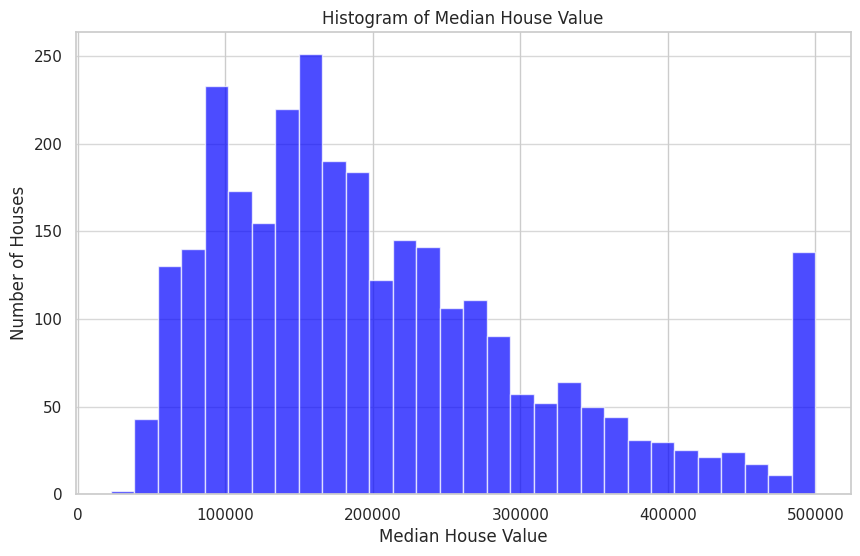

In [43]:
img_response = sdf.chat('Plot a histogram of median_house_value')

In [37]:
sdf.chat('What can you say about the distribution of median_house_value?')

'The distribution of median_house_value is approximately normal with a mean of 205846.27, median of 177650.00, and a standard deviation of 113119.69.'

### Example 4: Make a scatter plot of median_house_value and median_income.

'/content/exports/charts/temp_chart.png'

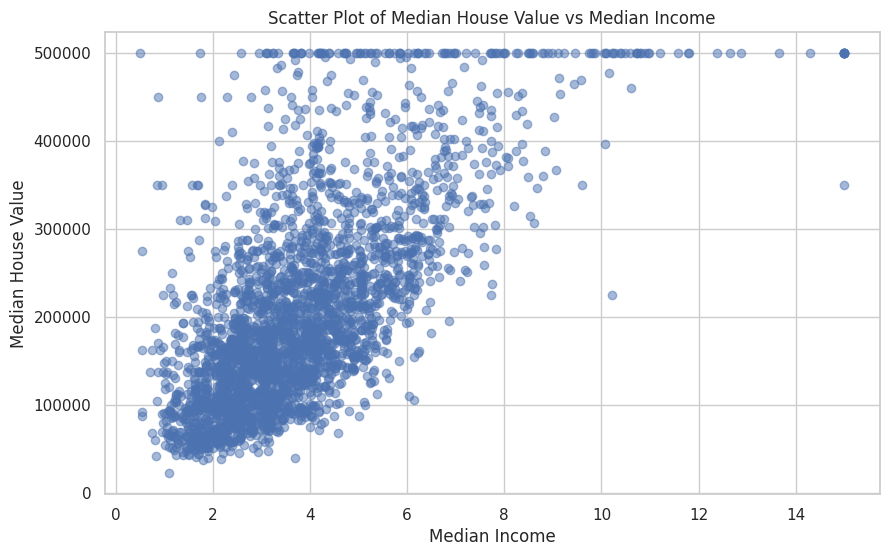

In [49]:
sdf.chat('Make a scatter plot of median_house_value and median_income.')

In [51]:
sdf.chat('How is the correlation between median_house_value and median_income? Interpret it')

'The correlation between median_house_value and median_income is 0.67. There is a positive correlation between median house value and median income, indicating that as income increases, house values tend to increase as well.'